In [1]:
# Import SQLAlchemy modules
import sqlite3
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
# Import visualization modules 
import pandas as pd
import folium
import geopandas as gpd
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from config import config
from pathlib import Path
import seaborn as sns

In [3]:
# Create engine to PostgreSQL database
engine = create_engine(config)

In [4]:
# Create inspector to get table names of database
inspector = inspect(engine)
inspector.get_table_names()

['table1', 'table2', 'table3']

# Gas Prices

In [19]:
# Grab fuel table from PostgreSQL and convert to pandas DataFrame
table_name = 'table1'
columns = inspector.get_columns(table_name)
column_names = [column['name'] for column in columns]

In [20]:
# Query data
sql_query = f"SELECT * FROM {table_name}"

In [21]:
# Display data table for preview
gas_prices_df = pd.read_sql_query(sql_query, engine)
gas_prices_df.head()

,Year,Gasoline All Grades,Diesel
0,2023,4.879,5.357
1,2022,5.406,6.028
2,2021,4.100,4.164
3,2020,3.132,3.377
4,2019,3.677,3.920


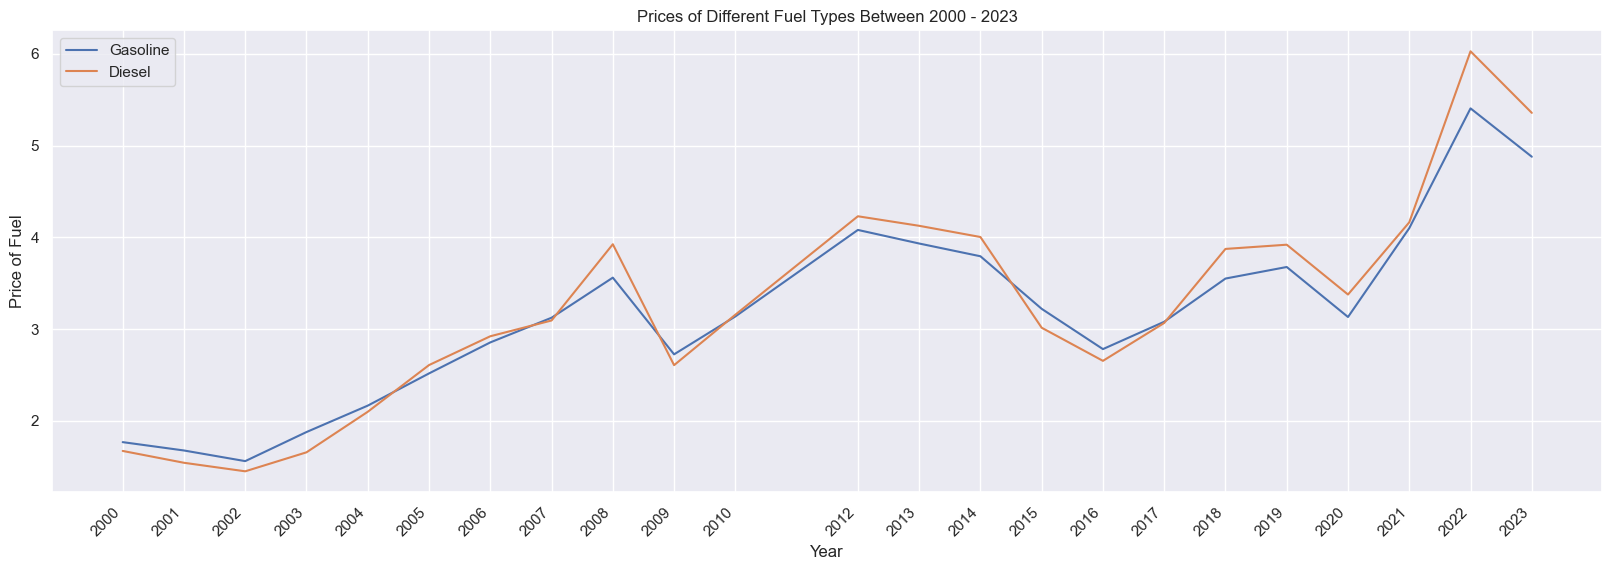

In [22]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
              font_scale=1, color_codes=True, rc=None)

plt.figure(figsize=(20, 6))  # Width: 10 inches, Height: 6 inches

sns.lineplot(x='Year', y='Gasoline All Grades',data=gas_prices_df, label='Gasoline')
sns.lineplot(x='Year', y='Diesel',data=gas_prices_df, label='Diesel')

plt.xlabel('Year')
plt.ylabel('Price of Fuel')
plt.title('Prices of Different Fuel Types Between 2000 - 2023')
sns.grid = True
plt.xticks(gas_prices_df['Year'],rotation=45, ha='right')

# Displaying the plot
plt.legend()
plt.show()

# Fuel Types

In [161]:
# Grab fuel table from PostgreSQL and convert to pandas DataFrame
fuel_table_name = 'table3'
fuel_columns = inspector.get_columns(fuel_table_name)
fuel_column_names = [column['name'] for column in fuel_columns]

# Query data
sql_query = f"SELECT * FROM {fuel_table_name}"
fuel_types_df = pd.read_sql_query(sql_query, engine)

In [162]:
# Display data table for preview
fuel_types_df.head()

,Year,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,2019,90000,<2006,Diesel and Diesel Hybrid,WHITE,Heavy,19
1,2019,90000,<2006,Gasoline,CHEVROLET,Light,33
2,2019,90000,<2006,Gasoline,DODGE,Light,11
3,2019,90000,<2006,Gasoline,FORD,Light,28
4,2019,90000,<2006,Gasoline,GMC,Light,19


In [163]:
# Check for unique fuel types
fuel_types = fuel_types_df["Fuel"].unique()
fuel_types

array(['Diesel and Diesel Hybrid', 'Gasoline', 'Flex-Fuel',
       'Hybrid Gasoline', 'Battery Electric', 'Plug-in Hybrid',
       'Natural Gas', 'Hydrogen Fuel Cell'], dtype=object)

In [164]:
# Check the counts per fuel type
fuel_type_counts = fuel_types_df["Fuel"].value_counts()
fuel_type_counts

Fuel
Gasoline                    1553976
Flex-Fuel                    127987
Hybrid Gasoline              122523
Diesel and Diesel Hybrid     108997
Battery Electric              32850
Plug-in Hybrid                30696
Natural Gas                    1879
Hydrogen Fuel Cell              412
Name: count, dtype: int64

In [165]:
# New dataframe with grouped fuel types

fuel_types_df["Fuel"] = fuel_types_df["Fuel"].replace({'Gasoline': 'Gas','Diesel and Diesel Hybrid': 'Diesel', 'Flex-Fuel': 'Gas',
       'Hybrid Gasoline': 'Hybrid', 'Battery Electric': 'Electric', 'Plug-in Hybrid': 'Hybrid',
       'Natural Gas': 'Gas', 'Hydrogen Fuel Cell': 'Hydrogen'})

fuel_types_df.head()

,Year,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,2019,90000,<2006,Diesel,WHITE,Heavy,19
1,2019,90000,<2006,Gas,CHEVROLET,Light,33
2,2019,90000,<2006,Gas,DODGE,Light,11
3,2019,90000,<2006,Gas,FORD,Light,28
4,2019,90000,<2006,Gas,GMC,Light,19


In [166]:
# Check unique fuel types after the update
fuel_types = fuel_types_df["Fuel"].unique()
fuel_types

array(['Diesel', 'Gas', 'Hybrid', 'Electric', 'Hydrogen'], dtype=object)

In [167]:
# Check the counts per fuel type after the update
fuel_type_counts = fuel_types_df["Fuel"].value_counts()
fuel_type_counts

Fuel
Gas         1683842
Hybrid       153219
Diesel       108997
Electric      32850
Hydrogen        412
Name: count, dtype: int64

In [168]:
# List of the fuel types in order of the counts
sorted_fuel_types = ["Gas", "Hybrid", "Diesel", "Electric", "Hydrogen"]

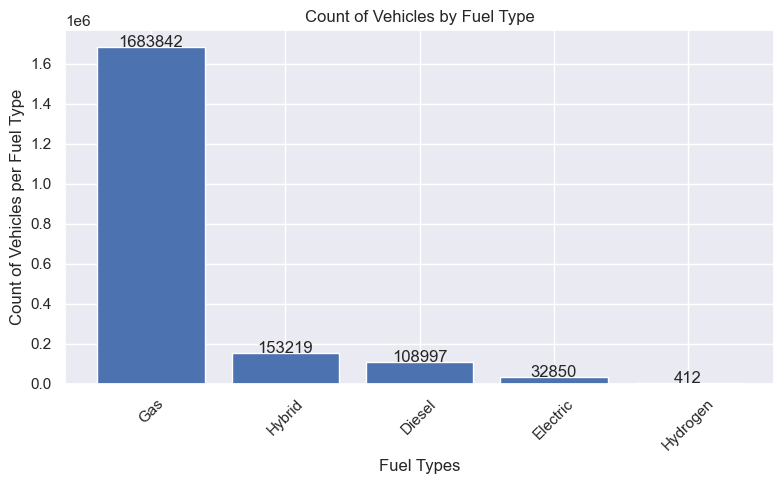

In [169]:
# Bar plot using matplotlib
x_axis = np.arange(len(fuel_type_counts))

plt.figure(figsize=(8, 5))
plt.bar(x_axis, fuel_type_counts)
plt.xticks(x_axis, sorted_fuel_types, rotation=45)
plt.xlabel("Fuel Types")
plt.ylabel("Count of Vehicles per Fuel Type")
plt.title("Count of Vehicles by Fuel Type")

# Adding the count values on top of the bars
for i, v in enumerate(fuel_type_counts):
    plt.text(i, v + 1, str(v), ha='center')

# Display bar chart
plt.tight_layout()
plt.show()

In [170]:
# Show fuel types data per year
fuel_types_df.groupby(["Year", "Fuel"]).size()

Year  Fuel    
2019  Diesel       22152
      Electric      4030
      Gas         332297
      Hybrid       26381
      Hydrogen        62
2020  Diesel       22172
      Electric      4930
      Gas         334307
      Hybrid       28523
      Hydrogen        80
2021  Diesel       20269
      Electric      5972
      Gas         341417
      Hybrid       29953
      Hydrogen        63
2022  Diesel       22126
      Electric      7458
      Gas         334478
      Hybrid       32739
      Hydrogen        94
2023  Diesel       22278
      Electric     10460
      Gas         341343
      Hybrid       35623
      Hydrogen       113
dtype: int64

In [171]:
# 2019-2023 Data
fuel_types_2019 = fuel_types_df[fuel_types_df['Year'] == 2019]
fuel_types_2020 = fuel_types_df[fuel_types_df['Year'] == 2020]
fuel_types_2021 = fuel_types_df[fuel_types_df['Year'] == 2021]
fuel_types_2022 = fuel_types_df[fuel_types_df['Year'] == 2022]
fuel_types_2023 = fuel_types_df[fuel_types_df['Year'] == 2023]

In [172]:
# Dropdown for bar charts with 2019-2023 data
fuel_type_counts_2019 = fuel_types_2019["Fuel"].value_counts()
fuel_type_counts_2020 = fuel_types_2020["Fuel"].value_counts()
fuel_type_counts_2021 = fuel_types_2021["Fuel"].value_counts()
fuel_type_counts_2022 = fuel_types_2022["Fuel"].value_counts()
fuel_type_counts_2023 = fuel_types_2023["Fuel"].value_counts()

def plot_chart(selected_chart):
    plt.figure(figsize=(8, 5))
    x_axis = np.arange(len(fuel_types_2019))
    
    if selected_chart == '2019':
        fuel_type_counts = fuel_type_counts_2019
        plt.title("Count of Vehicles by Fuel Type for 2019")
    elif selected_chart == '2020':
        fuel_type_counts = fuel_type_counts_2020
        plt.title("Count of Vehicles by Fuel Type for 2020")
    elif selected_chart == '2021':
        fuel_type_counts = fuel_type_counts_2021
        plt.title("Count of Vehicles by Fuel Type for 2021")
    elif selected_chart == '2022':
        fuel_type_counts = fuel_type_counts_2022
        plt.title("Count of Vehicles by Fuel Type for 2022")
    else:
        fuel_type_counts = fuel_type_counts_2023
        plt.title("Count of Vehicles by Fuel Type for 2023")
    
    x_axis = np.arange(len(fuel_types))
    
    plt.bar(x_axis, fuel_type_counts)
    plt.xticks(x_axis, sorted_fuel_types, rotation=45)
    plt.xlabel("Fuel Types")
    plt.ylabel("Count of Vehicles per Fuel Type")
    
    # Adding the count values on top of the bars
    for i, v in enumerate(fuel_type_counts):
        plt.text(i, v + 1, str(v), ha='center')
    
    plt.tight_layout()
    plt.show()

# Dropdown widget
year_dropdown = widgets.Dropdown(
    options=['2019', '2020', '2021', '2022', '2023'],
    value='2019',
    description='Select Year:',
    disabled=False,
)

# Display the dropdown
display(year_dropdown)

# Call the plot_chart function when dropdown value changes
widgets.interactive(plot_chart, selected_chart=year_dropdown)

Dropdown(description='Select Year:', options=('2019', '2020', '2021', '2022', '2023'), value='2019')

interactive(children=(Dropdown(description='Select Year:', options=('2019', '2020', '2021', '2022', '2023'), v…

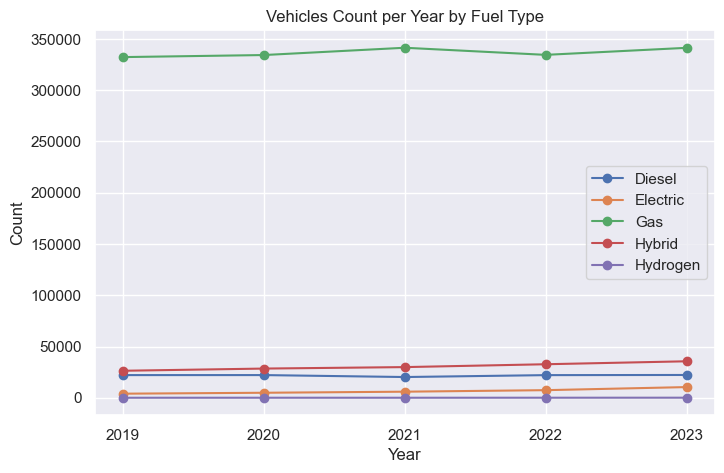

In [173]:
counts = fuel_types_df.groupby(['Year', 'Fuel']).size().unstack(fill_value=0)
counts

# Plot each fuel type
plt.figure(figsize=(8, 5))
for fuel_type in counts.columns:
    plt.plot(counts.index, counts[fuel_type], marker='o', label=fuel_type)

plt.title('Vehicles Count per Year by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.xticks(counts.index)
plt.show()

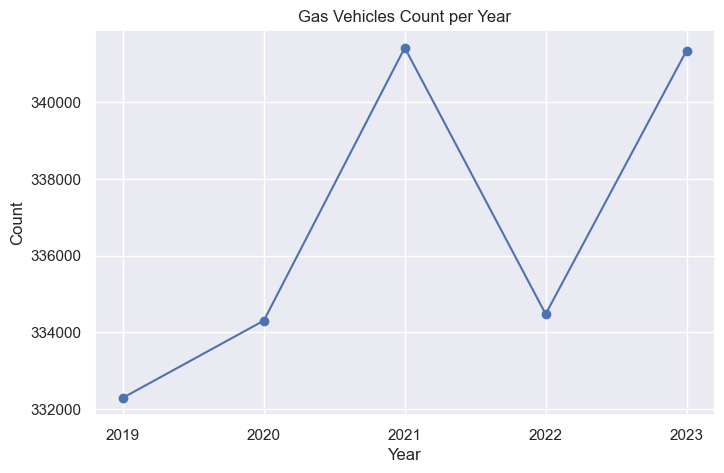

In [174]:
gas_df = fuel_types_df [fuel_types_df ['Fuel'] == 'Gas']
gas_counts = gas_df.groupby('Year').size().reset_index(name='Count')

# Show line chart for count of gas vehicles
plt.figure(figsize=(8, 5))
plt.plot(gas_counts['Year'], gas_counts['Count'], marker='o', linestyle='-')
plt.title('Gas Vehicles Count per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(gas_counts['Year'])
plt.show()

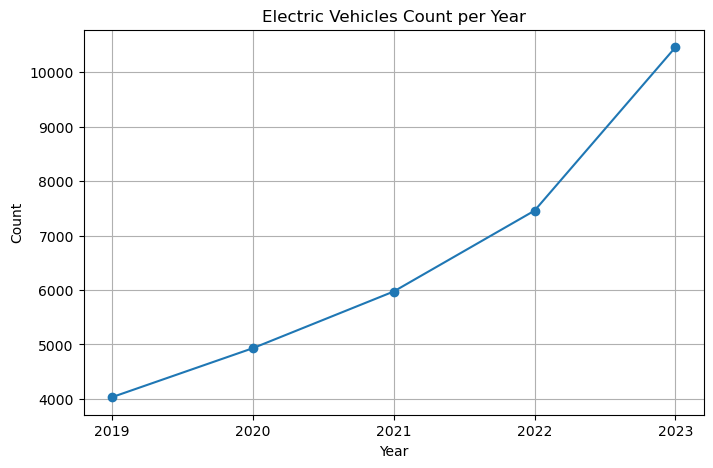

In [132]:
electric_df = fuel_types_df [fuel_types_df ['Fuel'] == 'Electric']
electric_counts = electric_df.groupby('Year').size().reset_index(name='Count')

# Show line chart for count of electric vehicles
plt.figure(figsize=(8, 5))
plt.plot(electric_counts['Year'], electric_counts['Count'], marker='o', linestyle='-')
plt.title('Electric Vehicles Count per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(electric_counts['Year'])
plt.show()

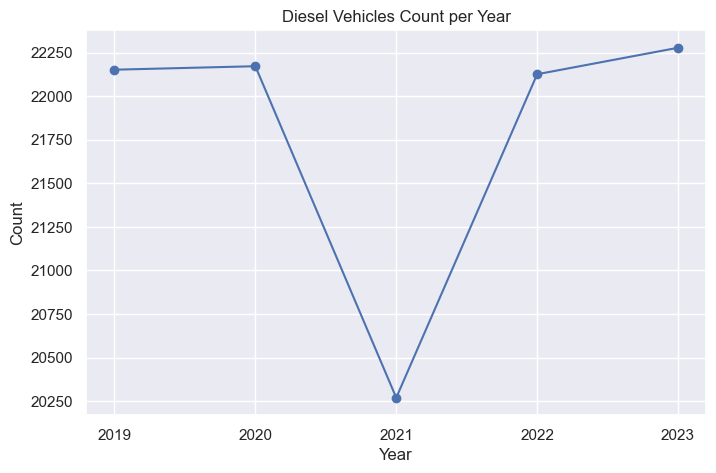

In [175]:
diesel_df = fuel_types_df [fuel_types_df ['Fuel'] == 'Diesel']
diesel_counts = diesel_df.groupby('Year').size().reset_index(name='Count')

# Show line chart for count of Diesel vehicles
plt.figure(figsize=(8, 5))
plt.plot(diesel_counts['Year'], diesel_counts['Count'], marker='o', linestyle='-')
plt.title('Diesel Vehicles Count per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(diesel_counts['Year'])
plt.show()

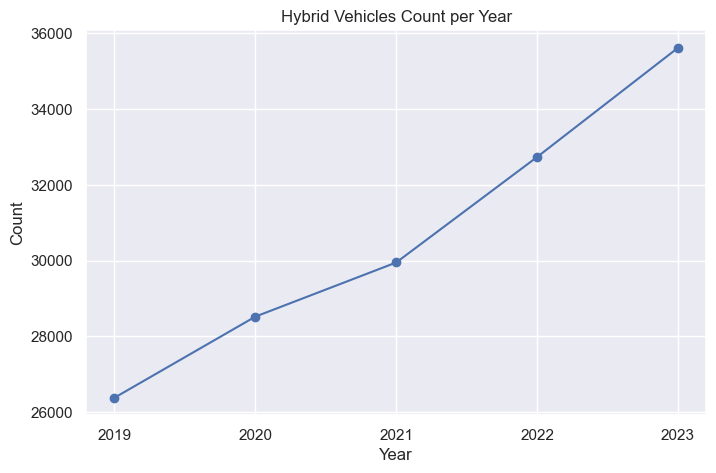

In [176]:
hybrid_df = fuel_types_df [fuel_types_df ['Fuel'] == 'Hybrid']
hybrid_counts = hybrid_df.groupby('Year').size().reset_index(name='Count')

# Show line chart for count of Hybrid vehicles
plt.figure(figsize=(8, 5))
plt.plot(hybrid_counts['Year'], hybrid_counts['Count'], marker='o', linestyle='-')
plt.title('Hybrid Vehicles Count per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(hybrid_counts['Year'])
plt.show()

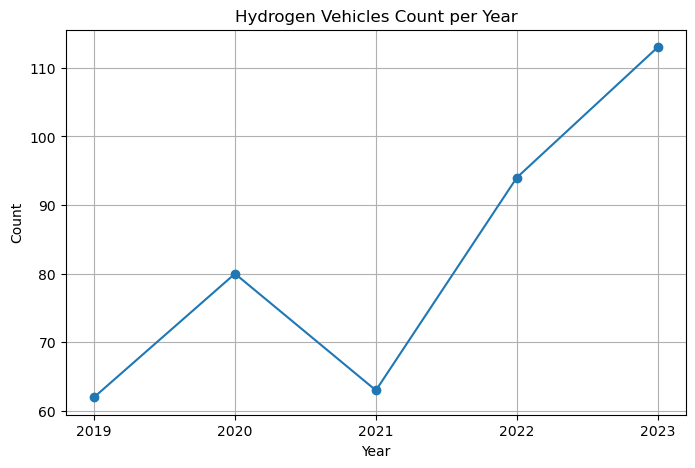

In [135]:
hydrogen_df = fuel_types_df [fuel_types_df ['Fuel'] == 'Hydrogen']
hydrogen_counts = hydrogen_df.groupby('Year').size().reset_index(name='Count')

# Show line chart for count of Hydrogen vehicles
plt.figure(figsize=(8, 5))
plt.plot(hydrogen_counts['Year'], hydrogen_counts['Count'], marker='o', linestyle='-')
plt.title('Hydrogen Vehicles Count per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(hydrogen_counts['Year'])
plt.show()

# Electric Chargers in California

In [5]:
chargers_name = "table2"
chargers_columns = inspector.get_columns(chargers_name)
chargers_column_names = [column['name'] for column in chargers_columns]

In [6]:
chargers_sql_query = f"SELECT * FROM {chargers_name}"

In [7]:
data = pd.read_sql_query(chargers_sql_query, engine)
data

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total,Date
0,Alameda,4,72,1625,2488,398,37,4624,9/1/2023
1,Alpine,0,0,10,0,0,0,10,9/1/2023
2,Amador,0,0,26,0,8,0,34,9/1/2023
3,Butte,6,0,63,55,25,0,149,9/1/2023
4,Calaveras,0,2,9,0,12,0,23,9/1/2023
...,...,...,...,...,...,...,...,...,...
749,Tulare,0,0,45,6,15,10,76,6/1/2020
750,Tuolumne,0,0,30,6,9,0,45,6/1/2020
751,Ventura,6,0,392,234,109,8,749,6/1/2020
752,Yolo,10,0,147,89,18,0,264,6/1/2020


In [8]:
chargers_df = data.drop(columns = {"Public Level 1", "Shared Private Level 1",
                                 "Public Level 2", "Public DC Fast", "Shared Private DC Fast", "Shared Private Level 2"})

chargers_df

,County,Total,Date
0,Alameda,4624,9/1/2023
1,Alpine,10,9/1/2023
2,Amador,34,9/1/2023
3,Butte,149,9/1/2023
4,Calaveras,23,9/1/2023
...,...,...,...
749,Tulare,76,6/1/2020
750,Tuolumne,45,6/1/2020
751,Ventura,749,6/1/2020
752,Yolo,264,6/1/2020


In [9]:
# Look for the the years
chargers_df["Date"].unique()

array(['9/1/2023', '6/1/2023', '12/1/2023', '9/1/2022', '6/1/2022',
       '3/1/2022', '12/1/2021', '9/1/2021', '6/1/2021', '3/1/2021',
       '12/1/2020', '9/1/2020', '6/1/2020'], dtype=object)

In [10]:
# Checking data types
chargers_df.dtypes

County    object
Total      int64
Date      object
dtype: object

In [11]:
# Read in the geojson file into a GeoPandas dataframe
filepath = "Resources/California_County_Boundaries.geojson"
geodata = gpd.read_file(filepath)

# Drop unused columns and rename
geodata = geodata.drop(columns = {"OBJECTID", "AdminRegion", "FireMAR", "LawMAR", "State_FIPS_ID", "County_FIPS_ID"})
geodata.rename(columns={"CountyName": "County"}, inplace=True)

geodata.head()

,County,Shape__Area,Shape__Length,geometry
0,Alameda,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682..."
1,Alpine,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8..."
2,Amador,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5..."
3,Butte,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0..."
4,Calaveras,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5..."


In [12]:
# Merge the GeoPandas dataframe with the CSV dataframe
merged_df = geodata.merge(chargers_df, how="right", on="County")

# Expand the date column so that only the year is isolated
merged_df[["Month", "Date", "Year"]] = merged_df["Date"].str.split("/", expand=True)
merged_df = merged_df.drop(columns = {"Date", "Month"})

merged_df.head()

,County,Shape__Area,Shape__Length,geometry,Total,Year
0,Alameda,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",4624,2023
1,Alpine,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8...",10,2023
2,Amador,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5...",34,2023
3,Butte,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0...",149,2023
4,Calaveras,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5...",23,2023


In [13]:
# Find the total number of electric chargers for all years
years = merged_df.groupby(["County", "Year"])["Total"].sum()

# Put this into a new dataframe and reset index
new_df = pd.DataFrame(years)
new_df.reset_index(inplace=True)
new_df.head()

,County,Year,Total
0,Alameda,2020,9425
1,Alameda,2021,14426
2,Alameda,2022,14472
3,Alameda,2023,13558
4,Alpine,2020,40


In [14]:
# Filter out based on year 2023 and merge to the GeoPandas dataframe
year_2023 = new_df[(new_df["Year"] == "2023")]

merged_2023 = geodata.merge(year_2023, how ="right", on="County")

merged_2023["Total (log scale)"] = np.log10(merged_2023["Total"])
merged_2023.head()

,County,Shape__Area,Shape__Length,geometry,Year,Total,Total (log scale)
0,Alameda,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",2023,13558,4.132196
1,Alpine,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8...",2023,26,1.414973
2,Amador,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5...",2023,102,2.008600
3,Butte,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0...",2023,442,2.645422
4,Calaveras,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5...",2023,69,1.838849


In [15]:
# Filter out based on year 2022 and merge to the GeoPandas dataframe
year_2022 = new_df[(new_df["Year"] == "2022")]

merged_2022 = geodata.merge(year_2022, how ="right", on="County")

merged_2022["Total (log scale)"] = np.log10(merged_2022["Total"])
merged_2022.head()

,County,Shape__Area,Shape__Length,geometry,Year,Total,Total (log scale)
0,Alameda,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",2022,14472,4.160529
1,Alpine,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8...",2022,50,1.698970
2,Amador,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5...",2022,99,1.995635
3,Butte,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0...",2022,429,2.632457
4,Calaveras,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5...",2022,67,1.826075


In [16]:
# Filter out based on year 2021 and merge to the GeoPandas dataframe
year_2021 = new_df[(new_df["Year"] == "2021")]

merged_2021 = geodata.merge(year_2021, how ="right", on="County")

merged_2021["Total (log scale)"] = np.log10(merged_2021["Total"])
merged_2021.head()

,County,Shape__Area,Shape__Length,geometry,Year,Total,Total (log scale)
0,Alameda,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",2021,14426,4.159146
1,Alpine,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8...",2021,59,1.770852
2,Amador,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5...",2021,159,2.201397
3,Butte,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0...",2021,359,2.555094
4,Calaveras,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5...",2021,80,1.903090


In [17]:
# Filter out based on year 2020 and merge to the GeoPandas dataframe
year_2020 = new_df[(new_df["Year"] == "2020")]

merged_2020 = geodata.merge(year_2020, how ="right", on="County")

merged_2020["Total (log scale)"] = np.log10(merged_2020["Total"])
merged_2020.head()

,County,Shape__Area,Shape__Length,geometry,Year,Total,Total (log scale)
0,Alameda,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",2020,9425,3.974281
1,Alpine,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8...",2020,40,1.602060
2,Amador,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5...",2020,99,1.995635
3,Butte,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0...",2020,226,2.354108
4,Calaveras,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5...",2020,21,1.322219


In [18]:
# Create a dropdown widget for selecting the year
year_dropdown = widgets.Dropdown(
    options=[2020, 2021, 2022, 2023],
    value=2020,
    description="Select Year:",
    disabled=False,
)

# Function to update the choropleth map based on the selected year
def update_map(year):
    # Select the corresponding filtered DataFrame based on the selected year
    if year == 2020:
        filtered_df = merged_2020
    elif year == 2021:
        filtered_df = merged_2021
    elif year == 2022:
        filtered_df = merged_2022
    else:
        filtered_df = merged_2023
    
    # Create folium map with starting location at California 
    m = folium.Map(location=[36.7783, -119.4179], zoom_start=6,
                   tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
                   attr='<a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors')
    
    tooltip = folium.GeoJsonTooltip(
        fields=["County", "Total (log scale)"],
        aliases=["County:", "Total:"],
        localize=True,
        sticky=False,
        labels=True,
        style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
        """,
        max_width=800,
        show=True)
    
    g = folium.Choropleth(
        geo_data=filtered_df,
        data=filtered_df,
        columns=["County", "Total (log scale)"],
        key_on="feature.properties.County",
        fill_color="YlGnBu",
        fill_opacity=0.9,
        line_opacity=0.2,
        highlight = True,
        legend_name="Total Number of Electric Chargers per Year",
        name="Counties By Total Number of Electric Chargers",
        tooltip = tooltip,
        ).add_to(m)
    folium.LayerControl().add_to(m)
    
    display(m)

# Display the dropdown widget and map
widgets.interactive(update_map, year=year_dropdown)

interactive(children=(Dropdown(description='Select Year:', options=(2020, 2021, 2022, 2023), value=2020), Outp…